<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/UberEats_resturant_Menu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [9]:
import pandas as pd

# Load the dataset, specifying 'on_bad_lines='skip'' and 'quoting=3'
file_path = '/content/restaurant-menus.csv'
df_original = pd.read_csv(file_path, on_bad_lines='skip', quoting=3)

# quoting=3 corresponds to csv.QUOTE_NONE, which disables quote processing.
# on_bad_lines='skip' will skip lines that cause parsing errors, so, data might be lost.
# Consider inspecting and fixing the source CSV file for a more robust solution.

df = df_original.copy()

In [10]:
df.head(10)

,restaurant_id,category,name,description,price
0,1,Extra Large Pizza,Extra Large Meat Lovers,Whole pie.,15.99 USD
1,1,Extra Large Pizza,Extra Large Supreme,Whole pie.,15.99 USD
2,1,Extra Large Pizza,Extra Large Pepperoni,Whole pie.,14.99 USD
3,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon,Whole Pie,15.99 USD
4,1,Extra Large Pizza,Extra Large 5 Cheese,Whole pie.,14.99 USD
5,1,Extra Large Pizza,Extra Large Pepperoni Slice,Slice.,3.99 USD
6,1,Extra Large Pizza,Extra Large BBQ Chicken &amp; Bacon Slice,NaN,3.99 USD
7,1,Extra Large Pizza,Extra Large Meat Lovers Slice,Slice.,3.99 USD
8,1,Extra Large Pizza,Extra Large Supreme Slice,Slice.,3.99 USD
9,1,Extra Large Pizza,Extra Large 5 Cheese Slice,Slice.,3.99 USD


In [11]:
# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import nltk

# Download the 'omw-1.4' data package
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [13]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#   stopwords and punkt

print(stopwords.fileids())
print(nltk.data.find('tokenizers/punkt'))
print(nltk.data.find('corpora/stopwords'))


['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
/root/nltk_data/tokenizers/punkt
/root/nltk_data/corpora/stopwords


In [29]:

display(df.tail(5))

,restaurant_id,category,name,description,price
15123,337,EXTRA SAUCES,LEMON PEPPER RUB,Lemon Pepper Rub brings together black pepper ...,0.59 USD
15124,337,EXTRA SAUCES,RANCH,2 oz side of Ranch,0.69 USD
15125,337,EXTRA SAUCES,BLUE CHEESE,2 oz side of Blue Cheese,0.69 USD
15126,337,EXTRA SAUCES,CHEESE SAUCE,2 oz side of Cheese Sauce,0.69 USD
15127,Consider adding Miss Vickie's Chips,Dasani bottled water,and a Chocolate Chunk Cookie to complete your,NaN,NaN


In [16]:
#  basic analysis of data

import matplotlib.pyplot as plt
import numpy as np
#information about the DataFrame
df.info()

#  descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15128 entries, 0 to 15127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   restaurant_id  15128 non-null  object
 1   category       14731 non-null  object
 2   name           13167 non-null  object
 3   description    6600 non-null   object
 4   price          12139 non-null  object
dtypes: object(5)
memory usage: 591.1+ KB
       restaurant_id category          name               description    price
count          15128    14731         13167                      6600    12139
unique           782     1395          7524                      3241     1143
top                "    Sides  French Fries  "Served with white rice.  0.0 USD
freq             871      743            58                       101      280
restaurant_id       0
category          397
name             1961
description      8528
price            2989
dtype: int64


In [17]:

# Print column names
df.columns


Index(['restaurant_id', 'category', 'name', 'description', 'price'], dtype='object')

In [18]:
# nunique column values

for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")


Column 'restaurant_id': 782 unique values
Column 'category': 1395 unique values
Column 'name': 7524 unique values
Column 'description': 3241 unique values
Column 'price': 1143 unique values


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Numerical Features:
# Create histograms or box plots for numerical columns to understand their distribution, identify outliers, and potential skewness.
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')  # KDE for smoother distribution visualization
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], color='lightgreen')  # Boxplot to highlight outliers
    plt.title(f'Boxplot of {col}')
    plt.show()


<ipython-input-20-073df7766f68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order for better visualization
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38468 (\N{CJK UNIFIED IDEOGRAPH-9644}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30333 (\N{CJK UNIFIED IDEOGRAPH-767D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39277 (\N{CJK UNIFIED IDEOGRAPH-996D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/

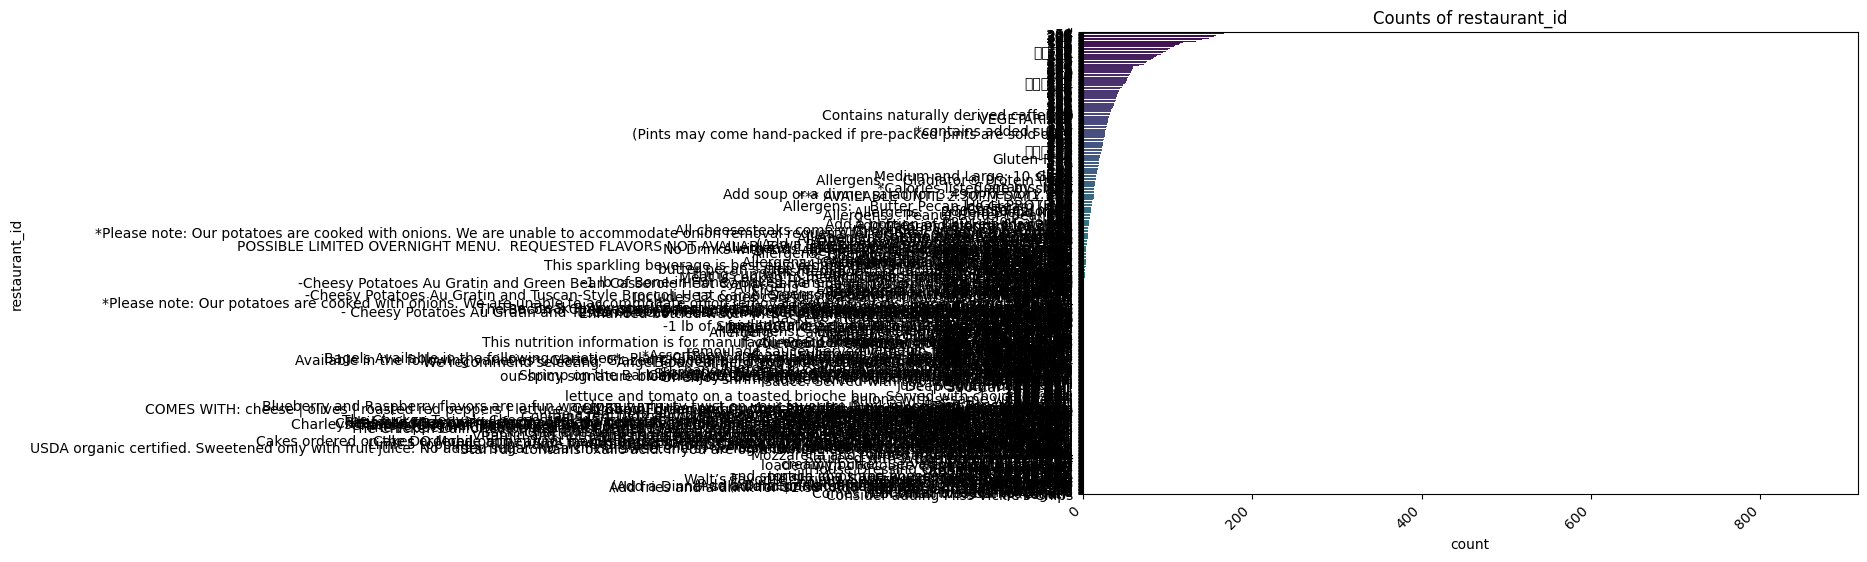

<ipython-input-20-073df7766f68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order for better visualization
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28023 (\N{CJK UNIFIED IDEOGRAPH-6D77}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40092 (\N{CJK UNIFIED IDEOGRAPH-9C9C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/

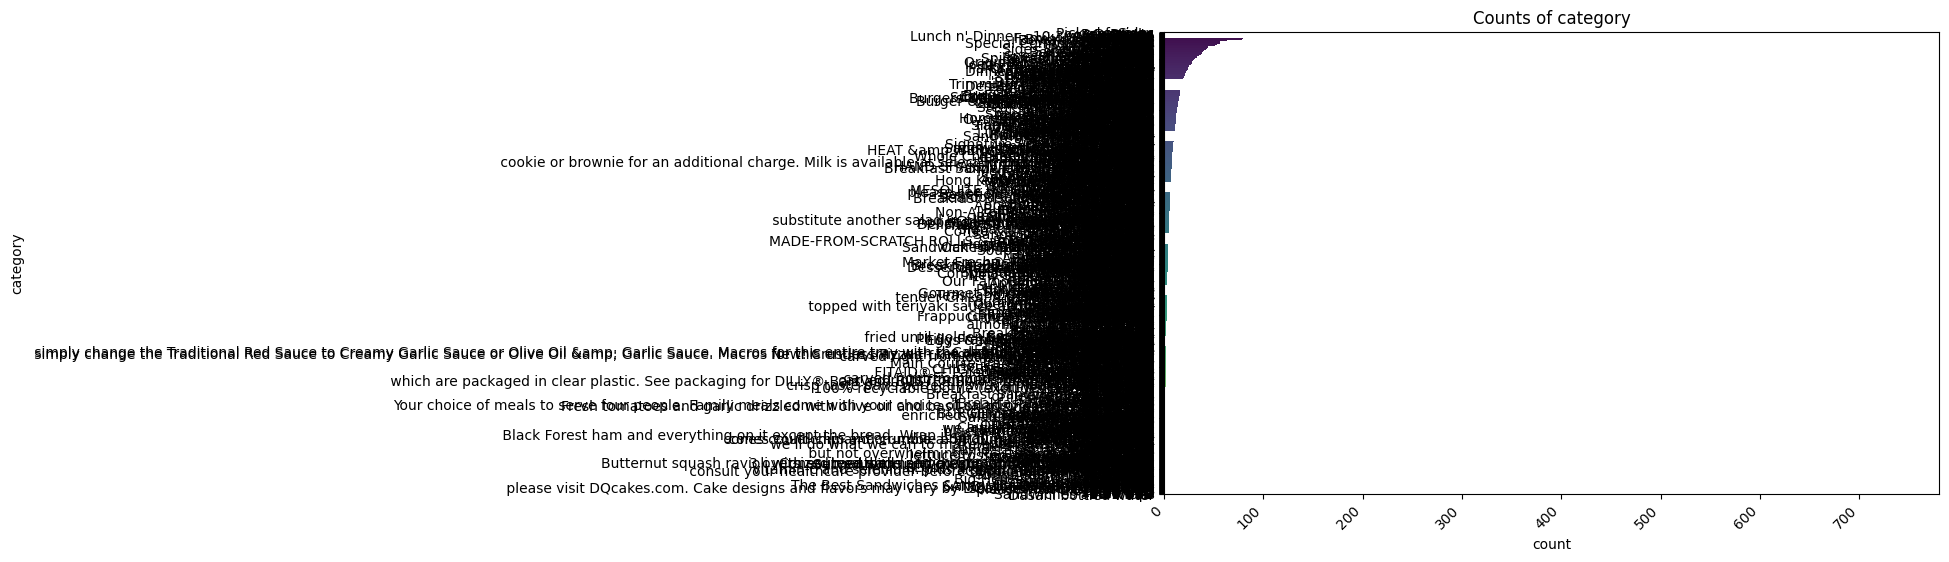

<ipython-input-20-073df7766f68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order for better visualization
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33437 (\N{CJK UNIFIED IDEOGRAPH-829D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40635 (\N{CJK UNIFIED IDEOGRAPH-9EBB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/

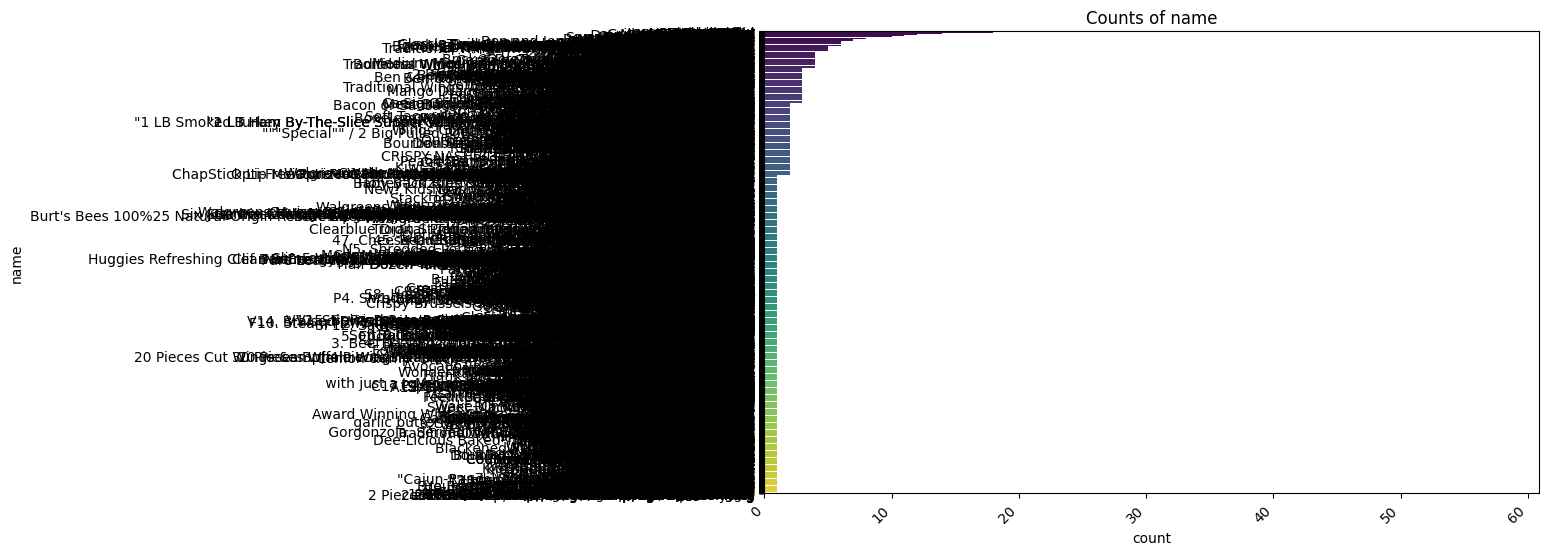

<ipython-input-20-073df7766f68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order for better visualization
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


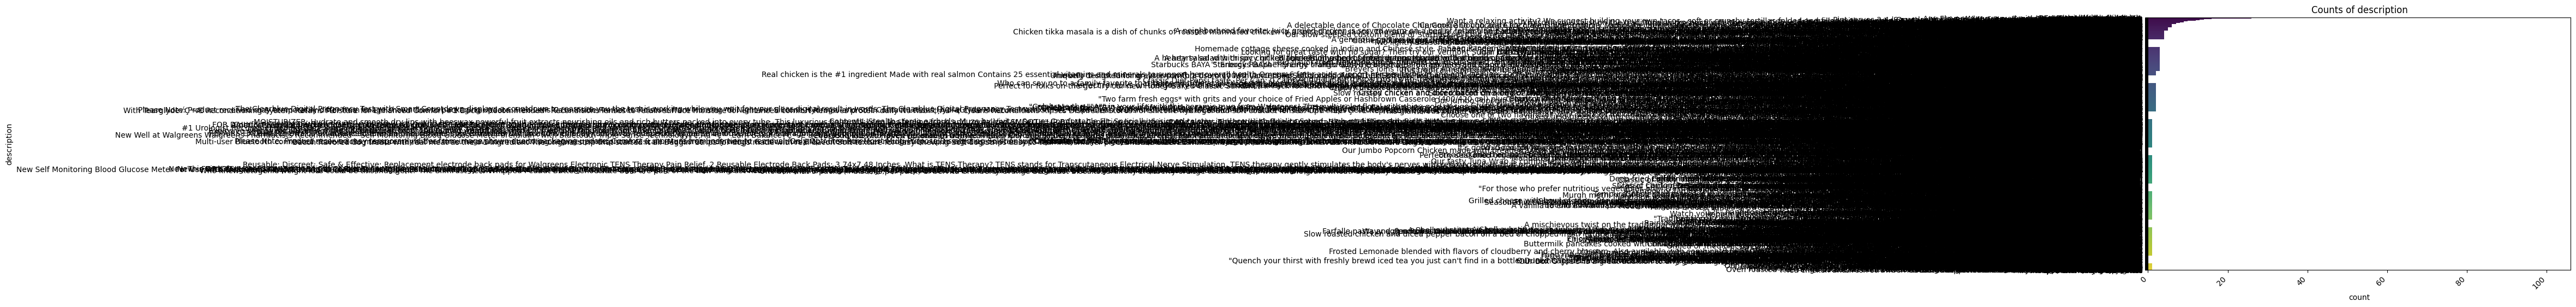

<ipython-input-20-073df7766f68>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order for better visualization


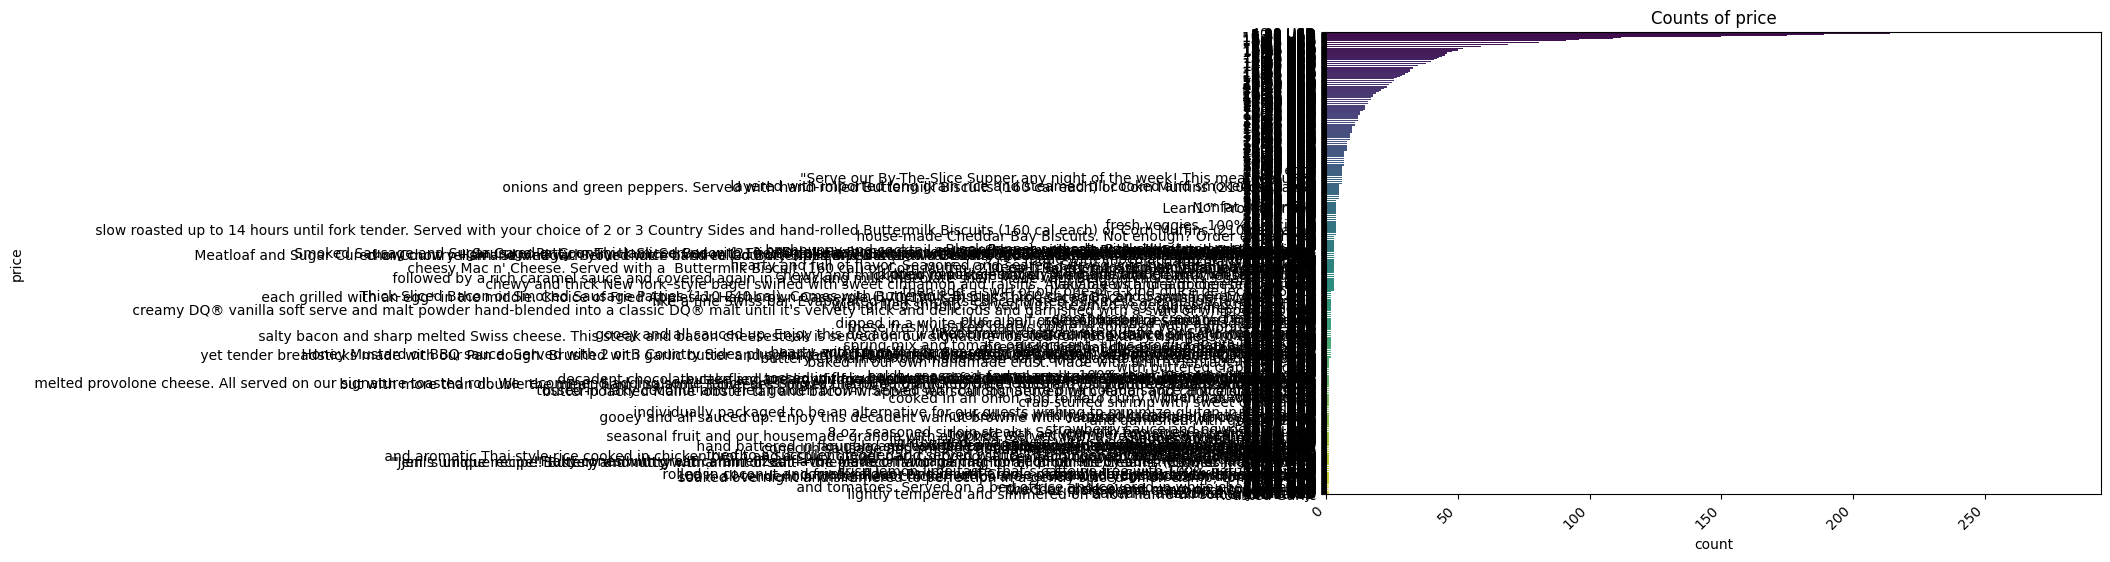

In [20]:
# 2. Categorical Feature Analysis:
# Use countplots or bar charts to visualize the frequency of categories within each categorical column.
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)  # Order
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.show()

In [21]:
# 3. Relationships between Numerical and Categorical Features:
#  Use box plots or violin plots to explore how numerical features vary across different categories.
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        if df[cat_col].nunique() < 10: # Limit to categorical columns with fewer unique values
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=df[cat_col], y=df[num_col], palette='pastel')
            plt.title(f'{num_col} vs {cat_col}')
            plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
            plt.show()


In [23]:
#  missing and duplicates

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# Display duplicate rows
print("\nDuplicate Rows:\n", df[df.duplicated()])


Missing Values:
 restaurant_id       0
category          397
name             1961
description      8528
price            2989
dtype: int64

Number of Duplicate Rows: 1458

Duplicate Rows:
                                            restaurant_id       category  \
200                                                    "       36.0 USD   
201                                                    "       36.0 USD   
202                                                    "       40.0 USD   
204                                                    "       38.0 USD   
221                                                    "       16.0 USD   
...                                                  ...            ...   
15085  All cheesesteaks come with optional creamy may...   juicy tomato   
15086  The Bacon 3 Cheesesteak pairs perfectly with C...            NaN   
15087                                                  "       8.39 USD   
15088  All cheesesteaks come with optional creamy may...   j

In [ ]:
# --------------------- Data Cleaning ---------------------
# Checking for missing values
display(df.isnull().sum())
print(df.isnull().sum())

,0
index,0
city,1
state,0
zipcode,3
address,0
loc_name,0
loc_number,0
url,0
promotion,890
latitude,0


index               0
city                1
state               0
zipcode             3
address             0
loc_name            0
loc_number          0
url                 0
promotion         890
latitude            0
longitude           0
is_open             0
closed_message     14
delivery_fee      997
delivery_time     986
review_count      626
review_rating     582
price_bucket      144
img1               47
img2               47
img3               47
img4               47
img5               47
scan_date           0
TID                 0
dtype: int64


In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Filling missing values (if any column needs it)
df.fillna("Unknown", inplace=True)

<ipython-input-46-1f5644c85ed3>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Unknown", inplace=True)


In [24]:
# --------------------- Text Preprocessing ---------------------
def clean_text(text):
    """Function to clean text data for sentiment analysis"""
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text
    df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)


In [28]:
 #column names and row index

# Print column names
print(df.columns)

# Print row names (index)
df.index


Index(['restaurant_id', 'category', 'name', 'description', 'price'], dtype='object')


RangeIndex(start=0, stop=15128, step=1)

In [31]:
!pip install nltk

import nltk
nltk.download('punkt_tab')
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_text)


# Apply the cleaning function to the relevant column
df['cleaned_text'] = df['description'].apply(clean_text) # Assuming 'description' column needs cleaning
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


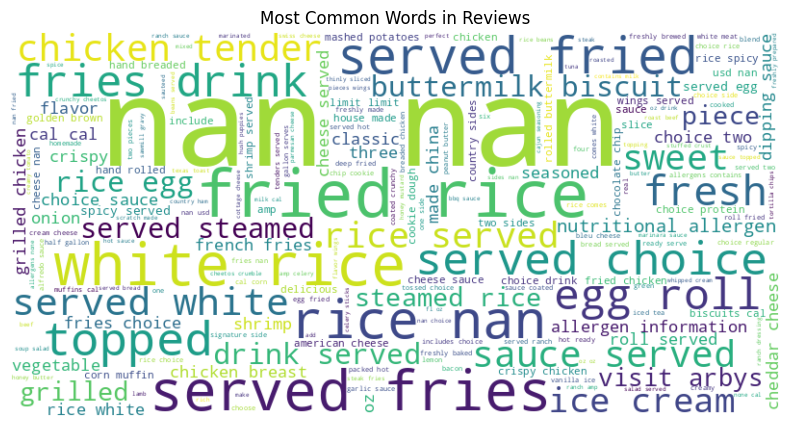

In [32]:
# WordCloud for common words in reviews
text_data = ' '.join(df['cleaned_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


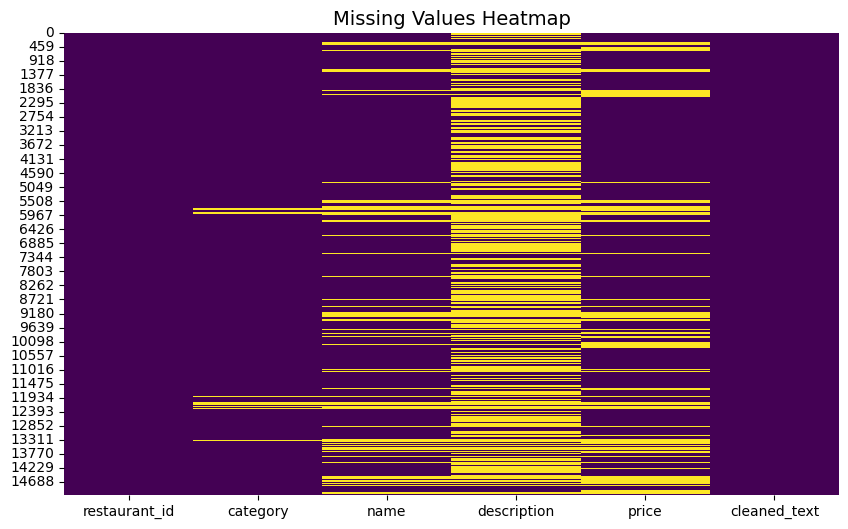

In [33]:
# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14)
plt.show()

In [34]:
# --------------------- Sentiment Analysis Preparation ---------------------
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [35]:
# Convert text into numerical format (Bag of Words & TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)  # Convert words into numerical format
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

In [36]:
# Display feature names (words used in vectorization)
print("Sample Features from TF-IDF Vectorizer:")
print(vectorizer.get_feature_names_out()[:20])

Sample Features from TF-IDF Vectorizer:
['00' '0013' '0593' '06' '10' '100' '1000' '1010' '10am' '10fm' '10oz'
 '11' '110' '1110' '1130' '1180' '11x14' '12' '120' '1200']
